In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [2]:
df = pd.read_csv('log.csv',sep=';')
df.head()

,id,project,connector_type,t,delta_t,url,redirect_url,response_size,response_code,success,error
0,0,rest_url_getter,requests,1.598532e+09,-0.970064,https://www.tripadvisor.dk/RestaurantSearch-g1...,https://www.tripadvisor.dk/RestaurantSearch-g1...,869511,200,True,NaN
1,1,rest_url_getter,requests,1.598532e+09,-1.034925,https://www.tripadvisor.dk/RestaurantSearch-g1...,https://www.tripadvisor.dk/RestaurantSearch-g1...,838000,200,True,NaN
2,2,rest_url_getter,requests,1.598532e+09,-0.990973,https://www.tripadvisor.dk/RestaurantSearch-g1...,https://www.tripadvisor.dk/RestaurantSearch-g1...,841978,200,True,NaN
3,3,rest_url_getter,requests,1.598532e+09,-0.892658,https://www.tripadvisor.dk/RestaurantSearch-g1...,https://www.tripadvisor.dk/RestaurantSearch-g1...,857439,200,True,NaN
4,4,rest_url_getter,requests,1.598532e+09,-0.922382,https://www.tripadvisor.dk/RestaurantSearch-g1...,https://www.tripadvisor.dk/RestaurantSearch-g1...,842730,200,True,NaN


In [3]:
df['time_minutes'] = round((df['t'] - df['t'][0]) / 60, 1)
df['response_size_k'] = round(df['response_size'] / 1000)
df.head()

,id,project,connector_type,t,delta_t,url,redirect_url,response_size,response_code,success,error,time_minutes,response_size_k
0,0,rest_url_getter,requests,1.598532e+09,-0.970064,https://www.tripadvisor.dk/RestaurantSearch-g1...,https://www.tripadvisor.dk/RestaurantSearch-g1...,869511,200,True,NaN,0.0,870.0
1,1,rest_url_getter,requests,1.598532e+09,-1.034925,https://www.tripadvisor.dk/RestaurantSearch-g1...,https://www.tripadvisor.dk/RestaurantSearch-g1...,838000,200,True,NaN,0.0,838.0
2,2,rest_url_getter,requests,1.598532e+09,-0.990973,https://www.tripadvisor.dk/RestaurantSearch-g1...,https://www.tripadvisor.dk/RestaurantSearch-g1...,841978,200,True,NaN,0.1,842.0
3,3,rest_url_getter,requests,1.598532e+09,-0.892658,https://www.tripadvisor.dk/RestaurantSearch-g1...,https://www.tripadvisor.dk/RestaurantSearch-g1...,857439,200,True,NaN,0.1,857.0
4,4,rest_url_getter,requests,1.598532e+09,-0.922382,https://www.tripadvisor.dk/RestaurantSearch-g1...,https://www.tripadvisor.dk/RestaurantSearch-g1...,842730,200,True,NaN,0.1,843.0


In [66]:
df['project'].unique()

array(['rest_url_getter', 'rest_data_getter', 'danish_revs_getter',
       'ind_rating_getter'], dtype=object)

In [67]:
colors = ["#5f9ea0", "#f08080" , '#228b22' , '#daa520']
sns.set_palette(sns.color_palette(colors))

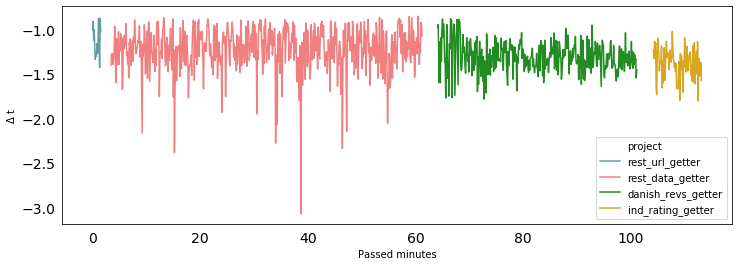

In [99]:
fig = plt.figure(constrained_layout = False , figsize=(12 ,4))

ax = sns.lineplot(x = 'time_minutes', y='delta_t', hue='project', data=df, ci=None).set(xlabel='Passed minutes', ylabel='Δ t')
plt.tick_params(axis = 'both' , which = 'both' , bottom = False , top = False , left = False , right = False , labelsize = 14) #Removes ticks

#sns.despine(left = True , bottom = False , right = True) #Removes border

plt.savefig('time_minutes1.png')

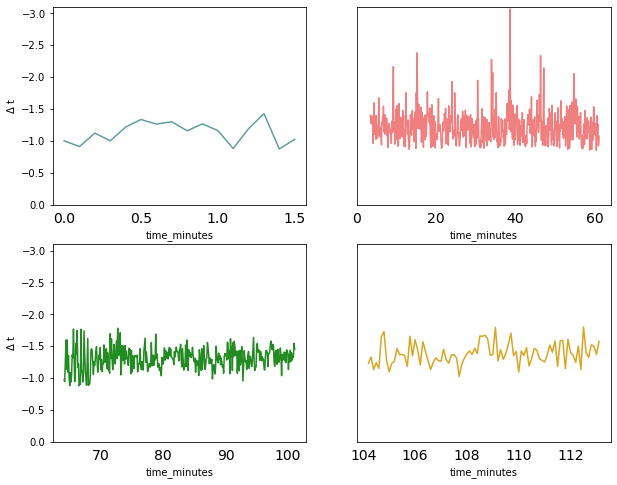

In [109]:
fig = plt.figure(constrained_layout = False , figsize=(10 ,8))
fig.add_gridspec(ncols = 2 , nrows = 2)

ax1 = plt.subplot(2 , 2 , 1)
sns.lineplot(x = 'time_minutes', y='delta_t', data=df[df['project'] == 'rest_url_getter'], ci=None , color = 'cadetblue')
ax1.set_ylim(0, -3.1)
ax1.tick_params(axis = 'x' , which = 'both' , bottom = False , top = False , left = False , right = False , labelsize = 14) #Removes ticks
ax1.yaxis.set_label_text("Δ t") #Removes axis name


ax2 = plt.subplot(2 , 2 , 2 , sharey = ax1)
sns.lineplot(x = 'time_minutes', y='delta_t', data=df[df['project'] == 'rest_data_getter'], ci=None , color = 'lightcoral')
ax2.set_ylim(0, -3.1)
ax2.set_xticks(np.arange(0 , 70 , step = 20))
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.yaxis.set_label_text("") #Removes axis name
ax2.tick_params(axis = 'both' , which = 'both' , bottom = False , top = False , left = False , right = False , labelsize = 14) #Removes ticks


ax3 = plt.subplot(2 , 2 , 3)
sns.lineplot(x = 'time_minutes', y='delta_t', data=df[df['project'] == 'danish_revs_getter'], ci=None , color = 'forestgreen')
ax3.set_ylim(0, -3.1)
ax3.tick_params(axis = 'x' , which = 'both' , bottom = False , top = False , left = False , right = False , labelsize = 14) #Removes ticks
ax3.yaxis.set_label_text("Δ t") #Removes axis name


ax4 = plt.subplot(2 , 2 , 4 , sharey = ax1)
ax4 = sns.lineplot(x = 'time_minutes', y='delta_t', data=df[df['project'] == 'ind_rating_getter'], ci=None , color = 'goldenrod')
ax4.set_ylim(0, -3.1)
plt.setp(ax4.get_yticklabels(), visible=False)
ax4.yaxis.set_label_text("") #Removes axis name
ax4.tick_params(axis = 'both' , which = 'both' , bottom = False , top = False , left = False , right = False , labelsize = 14) #Removes ticks


plt.savefig('time_minutes2.png')

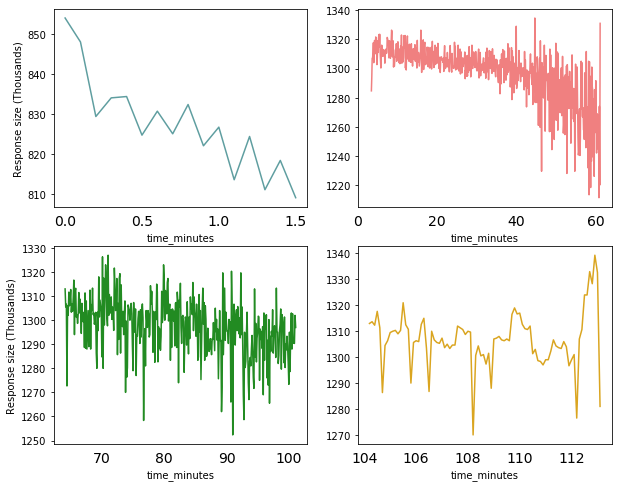

In [115]:
fig = plt.figure(constrained_layout = False , figsize=(10 ,8))
fig.add_gridspec(ncols = 2 , nrows = 2)

ax1 = plt.subplot(2 , 2 , 1)
sns.lineplot(x = 'time_minutes', y='response_size_k', data=df[df['project'] == 'rest_url_getter'], ci=None , color = 'cadetblue')
ax1.tick_params(axis = 'x' , which = 'both' , bottom = False , top = False , left = False , right = False , labelsize = 14) #Removes ticks
ax1.yaxis.set_label_text("Response size (Thousands)") #Removes axis name


ax2 = plt.subplot(2 , 2 , 2)
ax2 = sns.lineplot(x = 'time_minutes', y='response_size_k', data=df[df['project'] == 'rest_data_getter'], ci=None , color = 'lightcoral')
ax2.set_xticks(np.arange(0 , 70 , step = 20))
ax2.yaxis.set_label_text("") #Removes axis name
ax2.tick_params(axis = 'x' , which = 'both' , bottom = False , top = False , left = True , right = False , labelsize = 14) #Removes ticks


ax3 = plt.subplot(2 , 2 , 3)
sns.lineplot(x = 'time_minutes', y='response_size_k', data=df[df['project'] == 'danish_revs_getter'], ci=None , color = 'forestgreen')
ax3.tick_params(axis = 'x' , which = 'both' , bottom = False , top = False , left = False , right = False , labelsize = 14) #Removes ticks
ax3.yaxis.set_label_text("Response size (Thousands)") #Removes axis name


ax4 = plt.subplot(2 , 2 , 4)
sns.lineplot(x = 'time_minutes', y='response_size_k', data=df[df['project'] == 'ind_rating_getter'], ci=None , color = 'goldenrod')
ax4.yaxis.set_label_text("") #Removes axis name
ax4.tick_params(axis = 'x' , which = 'both' , bottom = False , top = False , left = True , right = False , labelsize = 14) #Removes ticks


plt.savefig('time_minutes3.png')

[Text(0, 0.5, 'Response size (thousands)'), Text(0.5, 0, 'Passed minutes')]

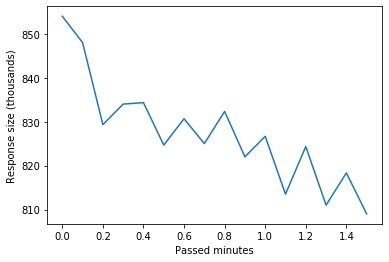

In [10]:
sns.lineplot(x = 'time_minutes', y='response_size_k', data=df[df['project'] == 'rest_url_getter'], ci=None).set(xlabel='Passed minutes', ylabel='Response size (thousands)')

[Text(0, 0.5, 'Response size (thousands)'), Text(0.5, 0, 'Passed minutes')]

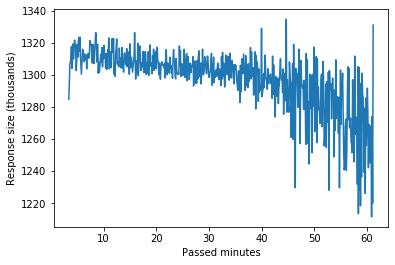

In [11]:
sns.lineplot(x = 'time_minutes', y='response_size_k', data=df[df['project'] == 'rest_data_getter'], ci=None).set(xlabel='Passed minutes', ylabel='Response size (thousands)')

[Text(0, 0.5, 'Response size (thousands)'), Text(0.5, 0, 'Passed minutes')]

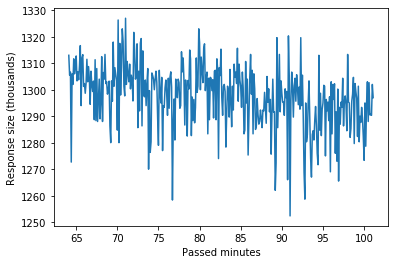

In [12]:
sns.lineplot(x = 'time_minutes', y='response_size_k', data=df[df['project'] == 'danish_revs_getter'], ci=None).set(xlabel='Passed minutes', ylabel='Response size (thousands)')

[Text(0, 0.5, 'Response size (thousands)'), Text(0.5, 0, 'Passed minutes')]

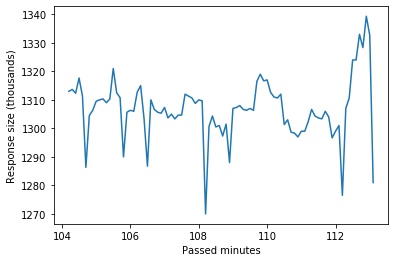

In [13]:
sns.lineplot(x = 'time_minutes', y='response_size_k', data=df[df['project'] == 'ind_rating_getter'], ci=None).set(xlabel='Passed minutes', ylabel='Response size (thousands)')